# 7번방의 선물에 대한 전체적인 분석

## 필요 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import date, timedelta
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
def remove_outlier_year(df):
    overindex= []
    for i in range(len(df)):
        if (df.loc[i, "날짜"].year <= (df.loc[0, "날짜"].year + 1)):
            overindex.append(i)
    df = df.loc[overindex,:]
    return df

def create_increase_column_sub(df):
    for i in range(len(df)):
        df.loc[i,"매출액증감(전일대비)비율"] = float(df.loc[i,"매출액증감(전일대비)"].split()[2][:-1])
        df.loc[i,"매출액증감(전일대비)"] = int(df.loc[i,"매출액증감(전일대비)"].split()[0])
    for i in range(len(df)):
        df.loc[i,"관객수증감(전일대비)비율"] = float(df.loc[i,"관객수증감(전일대비)"].split()[2][:-1])
        df.loc[i,"관객수증감(전일대비)"] = int(df.loc[i,"관객수증감(전일대비)"].split()[0])
    return df

def create_ratio_sub(df):
    df.loc[:,"스크린수대비관객수"] = df.loc[:,"관객수"] / df.loc[:,"스크린수"]
    df.loc[:,"좌석수대비관객수"] = df.loc[:,"관객수"] / df.loc[:,"좌석수"]
    # df.loc[:,"스크린점유율대비관객수"] = df.loc[:,"관객수"] / df.loc[:,"스크린점유율"]
    return df

In [3]:
micn7 = pd.read_excel("./data/top11_screen/7번방의선물.xls")

# 컬럼명 재설정 및 쓸데없는 행 제거
micn7.columns = micn7.loc[2,:]
micn7.columns.name = ""
micn7.drop([0,1,2], inplace=True)
micn7.reset_index(drop=True, inplace=True)

# 날짜 컬럼에서 시간 제거
for i in range(len(micn7)):
    micn7.loc[i,"날짜"] = micn7.loc[i,"날짜"].date()

# 다음년도 이후 년도 제거
micn7 = remove_outlier_year(micn7)

# 점유율 100퍼센트 형식으로 변경
for col in ["스크린점유율", "상영점유율", "좌석점유율", "좌석판매율"]:
    micn7.loc[:,col] = 100 * micn7.loc[:,col]

# 관객수, 매출액 증감 새로운 파생컬럼으로 나누기
micn7 = create_increase_column_sub(micn7)

# ~ 대비 관객수 컬럼 생성
micn7 = create_ratio_sub(micn7)

micn7

,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위,매출액증감(전일대비)비율,관객수증감(전일대비)비율,스크린수대비관객수,좌석수대비관객수
0,2013-01-13,1,0,1,0,280,0,100.7,1410000,1410000,282,282,1410000,282,27,100.0,100.0,282.0,1.007143
1,2013-01-14,6,0.2,6,0,2006,0.1,98.7,15210000,13800000,1980,1698,16620000,2262,12,978.7,602.1,330.0,0.987039
2,2013-01-16,3,0.1,3,0,834,0,101.4,6768000,6768000,846,846,23388000,3108,18,100.0,100.0,282.0,1.014388
3,2013-01-17,1,0,1,0,144,0,100,1008000,-5760000,144,-702,24396000,3252,31,-85.1,-83.0,144.0,1.0
4,2013-01-18,21,0.6,21,0.2,5454,0.2,99.8,48510000,47502000,5443,5299,72906000,8695,10,4712.5,3679.9,259.190476,0.997983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2013-08-21,1,0,1,0,142,0,77.5,550000,550000,110,110,91430026670,12810945,39,100.0,100.0,110.0,0.774648
131,2013-09-05,1,0,1,0,141,0,70.9,600000,600000,100,100,91430626670,12811045,42,100.0,100.0,100.0,0.70922
132,2013-09-24,1,0,1,0,161,0,100,1288000,1288000,161,161,91431914670,12811206,33,100.0,100.0,161.0,1.0
133,2014-06-17,1,0,1,0,110,0,1.8,8000,8000,2,2,91431922670,12811208,76,100.0,100.0,2.0,0.018182


In [4]:
movies = pd.read_csv("./data/top11_movie_info.csv")
movies

,영화명,개봉일,관객수,스크린수,배급사,초기스크린수,초기스크린점유율,초기좌석수,초기좌석점유율,초기스크린수대비관객수,초기스크린점유율대비관객수,초기좌석수대비관객수,초기좌석점유율대비관객수
0,명량,2014-07-30,17613682,1587,(주)씨제이이엔엠,1159.0,33.6,1152173.0,48.4,15197.309750,524216.726190,15.287359,363919.049587
1,극한직업,2019-01-23,16265618,2003,(주)씨제이이엔엠,1553.0,25.4,1557839.0,53.3,10473.675467,640378.661417,10.441142,305171.069418
2,베테랑,2015-08-05,13414009,1115,(주)씨제이이엔엠,957.0,22.0,916883.0,34.8,14016.728318,609727.681818,14.630012,385460.028736
3,도둑들,2012-07-25,12983178,1091,(주)쇼박스,890.0,26.4,847704.0,40.1,14587.840449,491787.045455,15.315697,323770.024938
4,7번방의선물,2013-01-23,12811206,866,(주)넥스트엔터테인먼트월드(NEW),605.0,16.0,602838.0,27.1,21175.547107,800700.375000,21.251490,472738.228782
5,암살,2015-07-22,12705700,1519,(주)쇼박스,1264.0,28.2,1209819.0,49.0,10051.977848,450556.737589,10.502149,259300.000000
6,광해,2012-09-13,12319390,1001,(주)씨제이이엔엠,688.0,20.1,733974.0,33.3,17906.090116,612904.975124,16.784505,369951.651652
7,신과함께-인과연,2018-08-01,12274996,2235,롯데컬처웍스(주)롯데엔터테인먼트,1967.0,35.9,1742278.0,60.4,6240.465684,341921.894150,7.045372,203228.410596
8,택시운전사,2017-08-02,12186327,1906,(주)쇼박스,1446.0,27.5,1302719.0,43.8,8427.612033,443139.163636,9.354532,278226.643836
9,부산행,2016-07-20,11565479,1788,(주)넥스트엔터테인먼트월드(NEW),1571.0,33.0,1668254.0,61.3,7361.858052,350469.060606,6.932685,188670.130506


In [5]:
reviews = pd.read_csv("./data/reviews.csv")
reviews

,평점,내용
0,10,영화는 뻔했고 설정은 억지였다 하지만 그걸 살려낸 배우들이 대단한영화. 그중심엔 ...
1,7,천만영화의 부끄러운 실체. 배우들간의 앙상블은 훌륭했으나 작위적이고 평면적인 스토리...
2,7,천만관객을 끌어모은 것은 오직 배우들의 힘.
3,8,뜬금없는 열기구...
4,10,연기 정말 장난아님
...,...,...
44487,1,토나올 정도로 역겨운 감성팔이 중독 영화.. 이런 독극물 같은 영상 만드는 ㅅㄲ는 ...
44488,1,원래 영화 볼때 머리 비워두고 보는데 이 영화는 보는 내내 너무 억지스러웠다.천만 ...
44489,6,"억지 감동, 신파 작렬. 유승룡도 연기는 잘 하지만 독한 인상으로 그런 역을 하니 ..."
44490,2,류승룡 지적장애인 연기 더럽게못함 ㅋ 조승우 연기못봣냐? 그게 진짜 명연기지 류승룡...


In [6]:
reviews["평점"].mean()

8.853366897419761

In [7]:
def lineplotting(cols, df=micn7):
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(1,1,1)

    if type(cols) == str:
        sns.lineplot(df["날짜"], df[cols], ax=ax1)
    else:
        for col in cols:
            sns.lineplot(df["날짜"], df[col], ax=ax1)
        plt.legend(cols)
    
    plt.title(f"7번방의 선물의 개봉기간 동안의 {cols}")
    plt.savefig(f"./data/plot/7번방의 선물의 개봉기간 동안의 {cols}.jpg")
    plt.show()

def twinlineplotting(cols, df=micn7):
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(1,1,1)

    sns.lineplot(df["날짜"], df[cols[0]], ax=ax1, legend=False)
    ax2 = ax1.twinx()
    sns.lineplot(df["날짜"], df[cols[1]], ax=ax2, color="orange", legend=False)

    ax1.figure.legend(cols)
    plt.title(f"7번방의 선물의 개봉기간 동안의 {cols[0]}와 {cols[1]}비교")
    plt.savefig(f"./data/plot/7번방의 선물의 개봉기간 동안의 {cols[0]}와 {cols[1]}비교.jpg")
    plt.show()

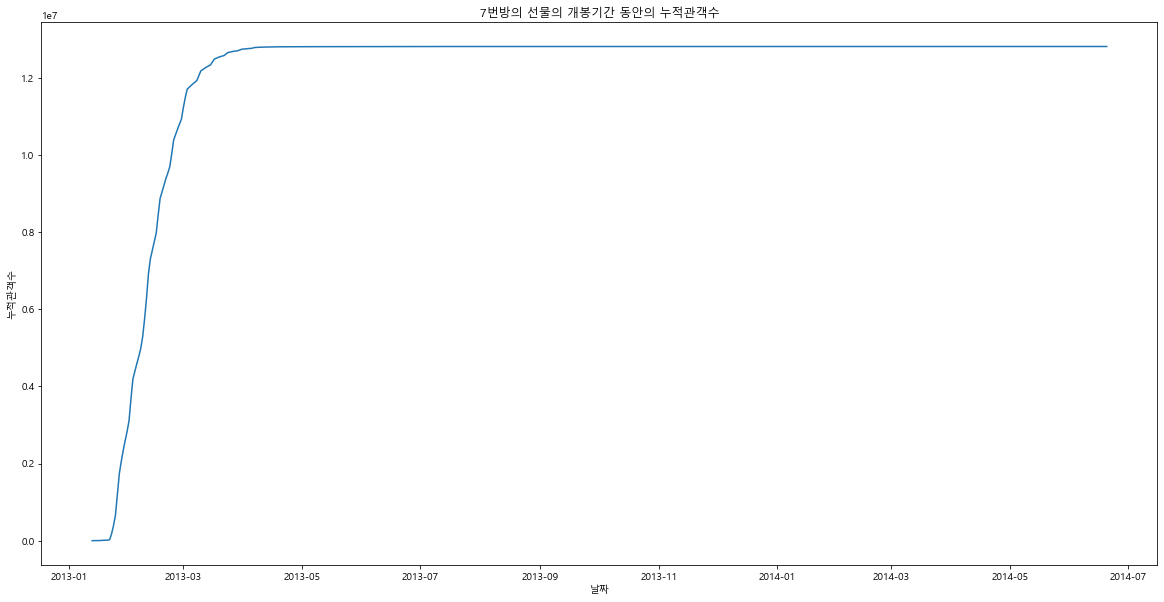

In [8]:
lineplotting("누적관객수")

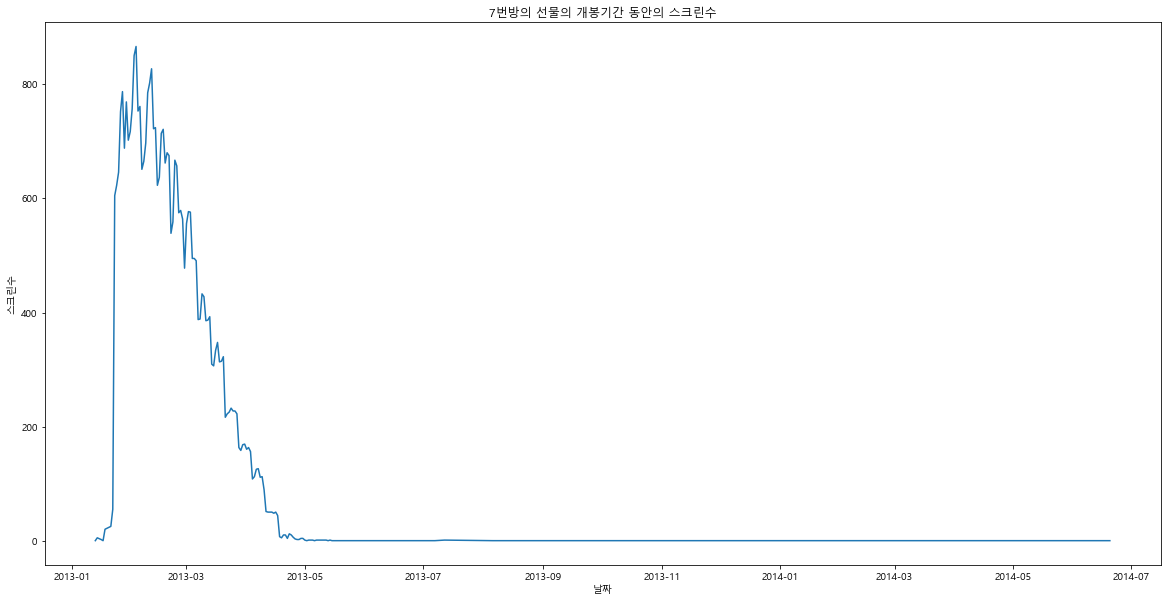

In [9]:
lineplotting("스크린수")

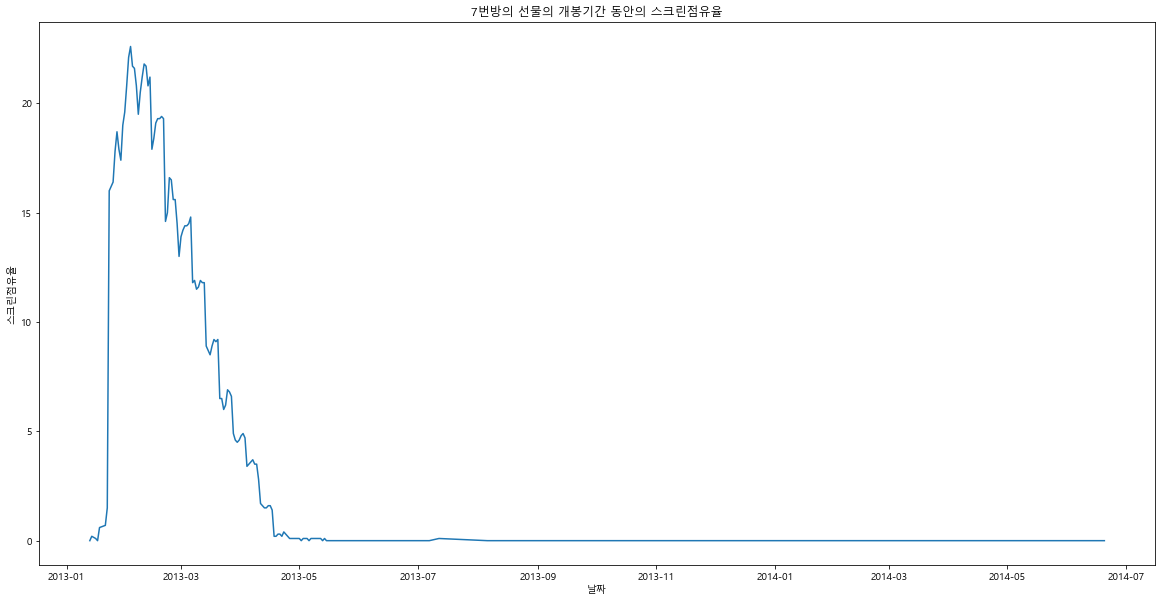

In [10]:
lineplotting("스크린점유율")

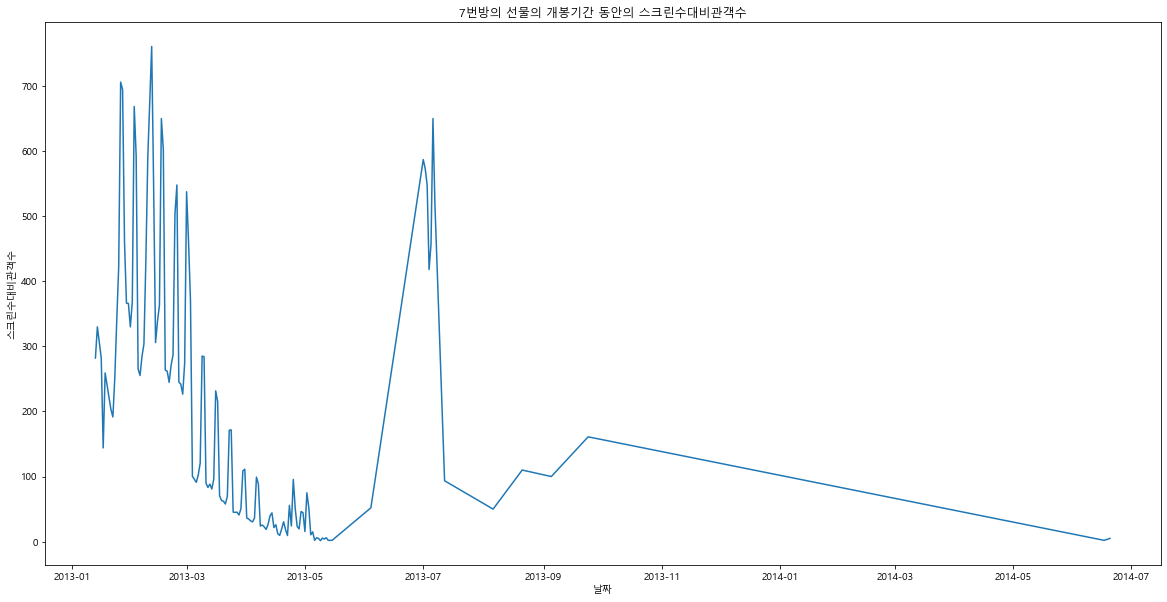

In [11]:
lineplotting("스크린수대비관객수")

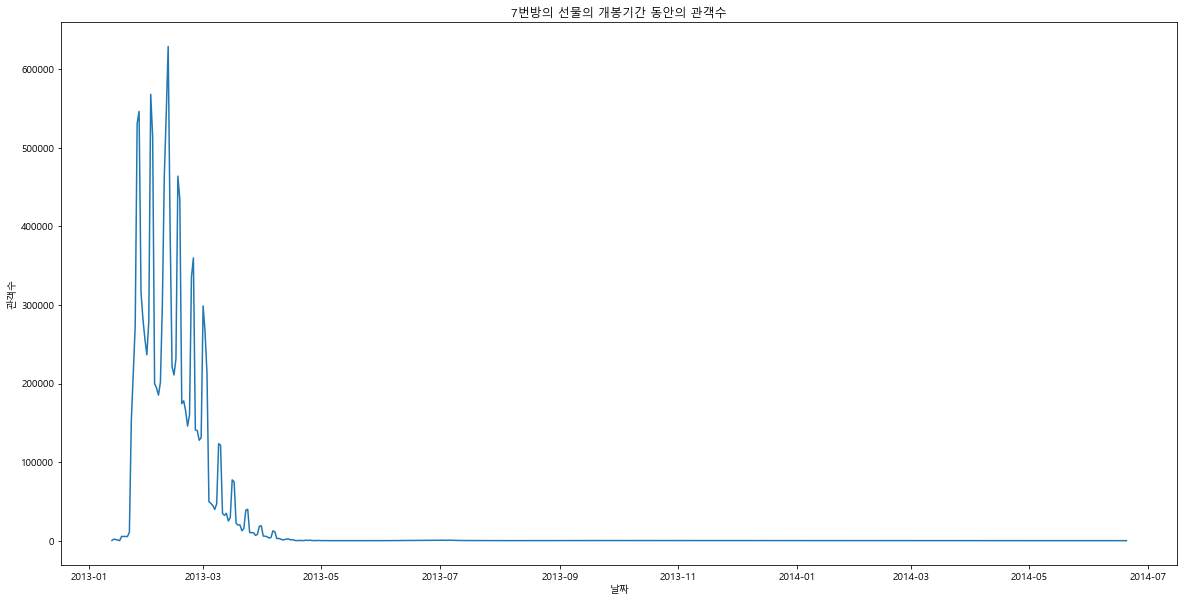

In [12]:
lineplotting("관객수")

In [13]:
# 개봉일로부터 연속적으로 개봉한 날들만 짜르기
con_df = micn7[micn7.loc[:,"날짜"] >= date(2013,1,23)]
con_df.head()

,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위,매출액증감(전일대비)비율,관객수증감(전일대비)비율,스크린수대비관객수,좌석수대비관객수
7,2013-01-23,605,16.0,2874,22.4,602838,27.1,25.3,1066485000,999641000,152808,142082,1238120000,177508,1,1495.5,1324.7,252.575207,0.253481
8,2013-01-24,623,16.2,2989,22.9,635671,28.0,33.4,1473455500,406970500,212148,59340,2711575500,389656,1,38.2,38.8,340.526485,0.333739
9,2013-01-25,646,16.4,3137,23.4,665355,28.5,41.1,2007309089,533853589,273136,60988,4718884589,662792,1,36.2,28.7,422.811146,0.410512
10,2013-01-26,752,17.8,3452,24.5,719508,29.6,73.8,3941053113,1933744024,530869,257733,8659937702,1193661,1,96.3,94.4,705.942819,0.737822
11,2013-01-27,787,18.7,3490,25.5,725848,30.7,75.3,4039741500,98688387,546386,15517,12699679202,1740047,1,2.5,2.9,694.264295,0.752755


In [14]:
con_df.reset_index(drop=True, inplace=True)

In [15]:
for i in range(1,len(con_df)-1):
    if con_df.loc[i, "날짜"] != con_df.loc[i-1, "날짜"] + timedelta(days=1):
        print(i)
        break

113


In [16]:
con_df = con_df[0:113]

In [17]:
con_df

,날짜,스크린수,스크린점유율,상영횟수,상영점유율,좌석수,좌석점유율,좌석판매율,매출액,매출액증감(전일대비),관객수,관객수증감(전일대비),누적매출액,누적관객수,순위,매출액증감(전일대비)비율,관객수증감(전일대비)비율,스크린수대비관객수,좌석수대비관객수
0,2013-01-23,605,16.0,2874,22.4,602838,27.1,25.3,1066485000,999641000,152808,142082,1238120000,177508,1,1495.5,1324.7,252.575207,0.253481
1,2013-01-24,623,16.2,2989,22.9,635671,28.0,33.4,1473455500,406970500,212148,59340,2711575500,389656,1,38.2,38.8,340.526485,0.333739
2,2013-01-25,646,16.4,3137,23.4,665355,28.5,41.1,2007309089,533853589,273136,60988,4718884589,662792,1,36.2,28.7,422.811146,0.410512
3,2013-01-26,752,17.8,3452,24.5,719508,29.6,73.8,3941053113,1933744024,530869,257733,8659937702,1193661,1,96.3,94.4,705.942819,0.737822
4,2013-01-27,787,18.7,3490,25.5,725848,30.7,75.3,4039741500,98688387,546386,15517,12699679202,1740047,1,2.5,2.9,694.264295,0.752755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2013-05-11,2,0.1,4,0,542,0,1.5,45000,-28000,8,-3,91420638670,12806774,106,-38.4,-27.3,4.0,0.01476
109,2013-05-12,2,0.1,4,0,542,0,2.2,82000,37000,12,4,91420720670,12806786,83,82.2,50.0,6.0,0.02214
110,2013-05-13,1,0,1,0,141,0,1.4,14000,-68000,2,-10,91420734670,12806788,124,-82.9,-83.3,2.0,0.014184
111,2013-05-14,2,0.1,2,0,260,0,1.5,26000,12000,4,2,91420760670,12806792,115,85.7,100.0,2.0,0.015385


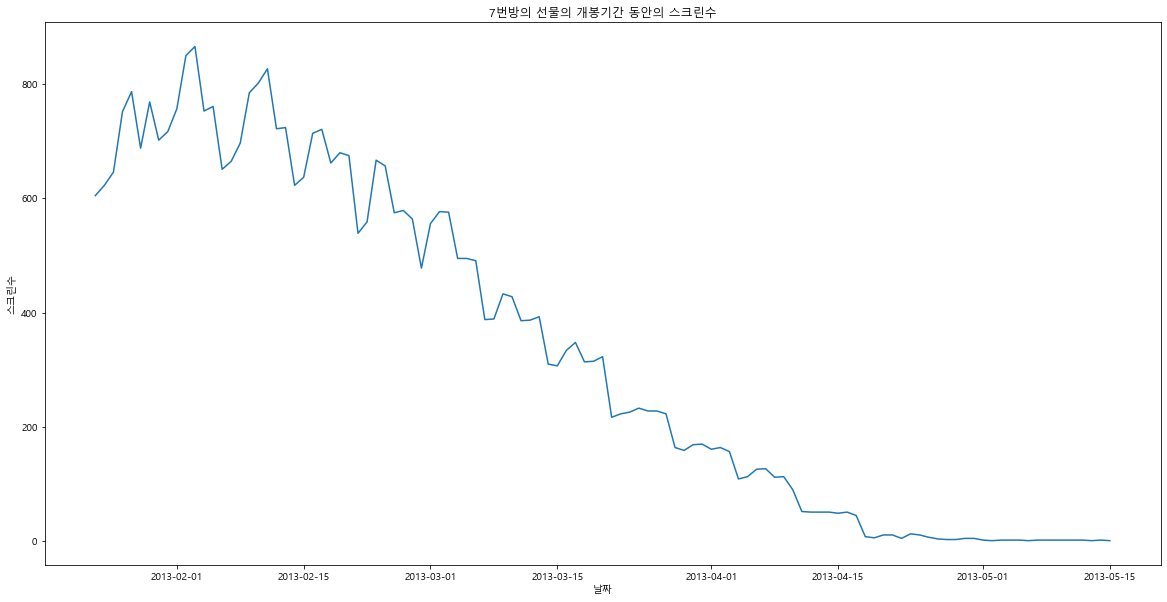

In [18]:
lineplotting("스크린수", df=con_df)

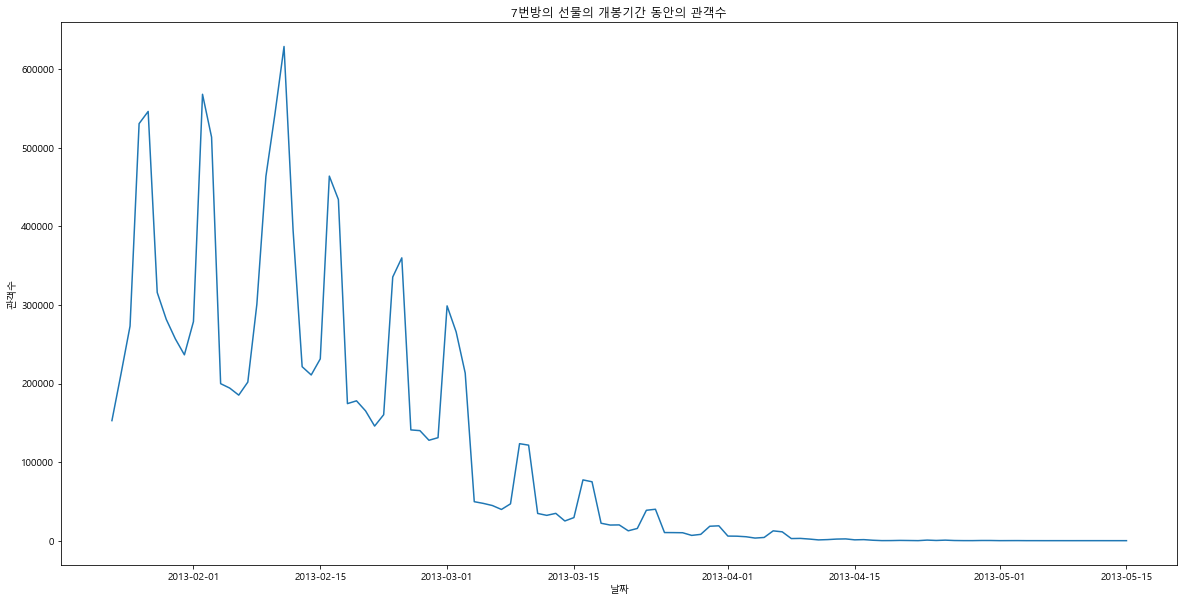

In [19]:
lineplotting("관객수", df=con_df)

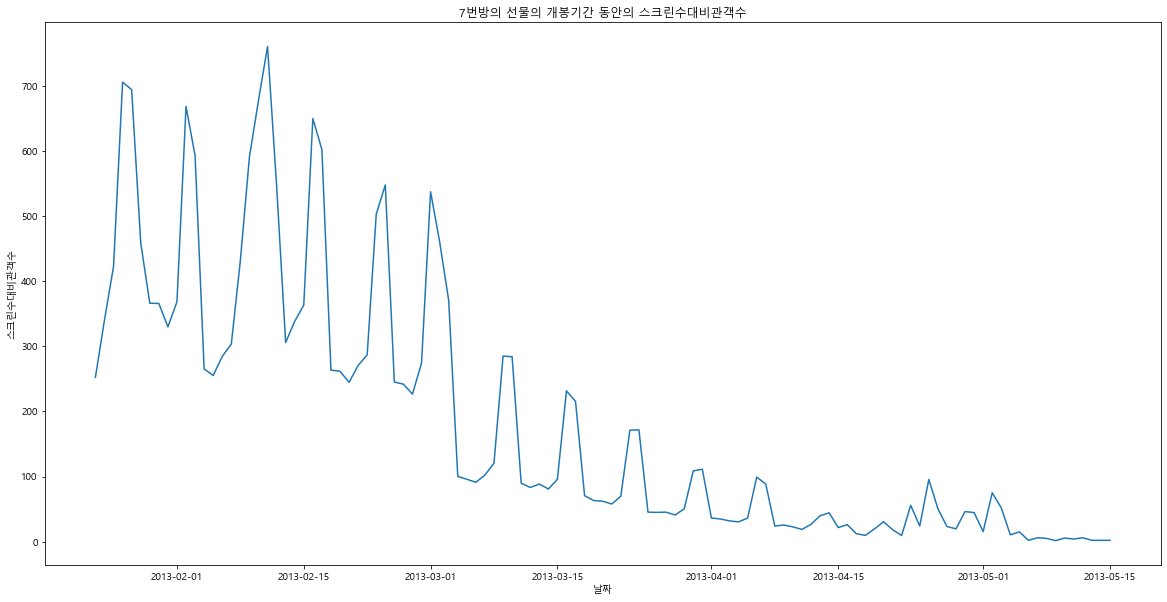

In [20]:
lineplotting("스크린수대비관객수", df=con_df)

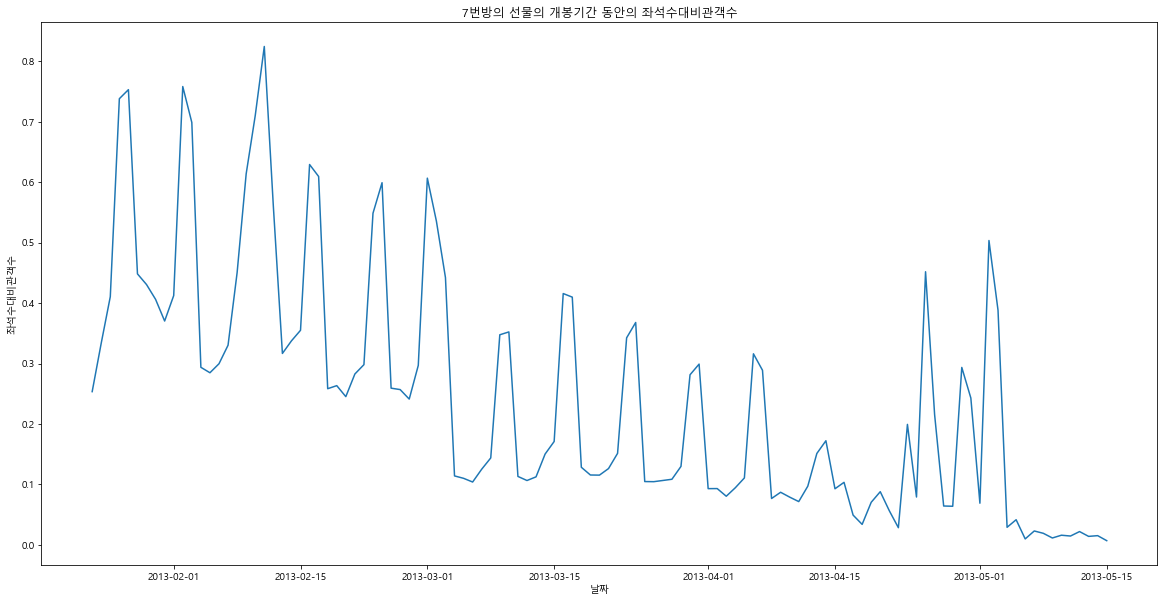

In [21]:
lineplotting("좌석수대비관객수", df=con_df)

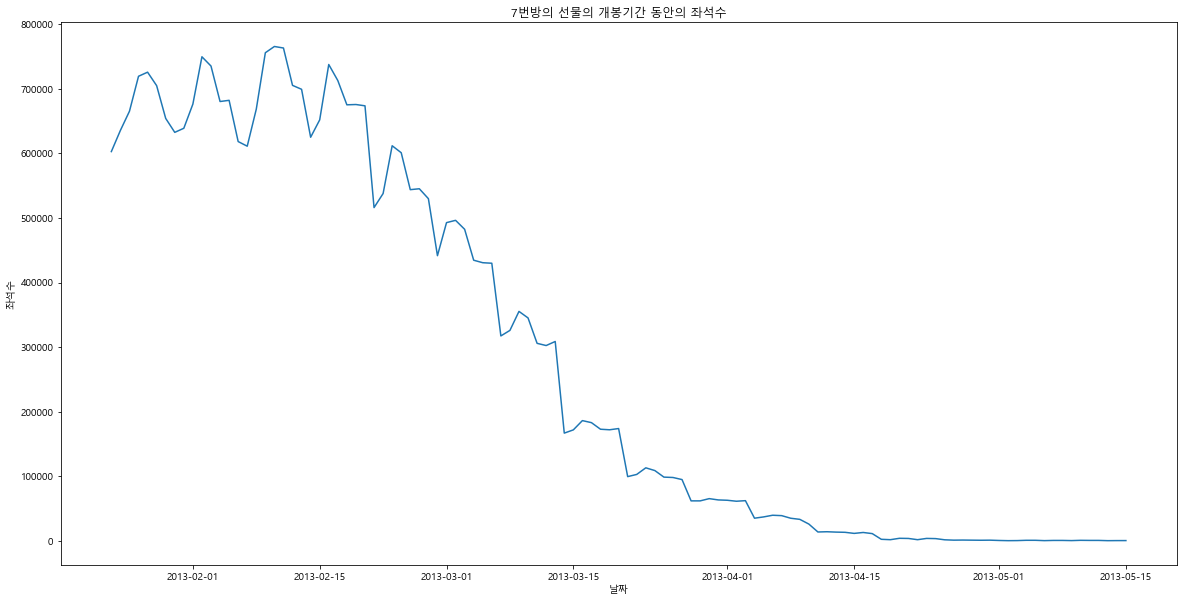

In [22]:
lineplotting("좌석수", df=con_df)

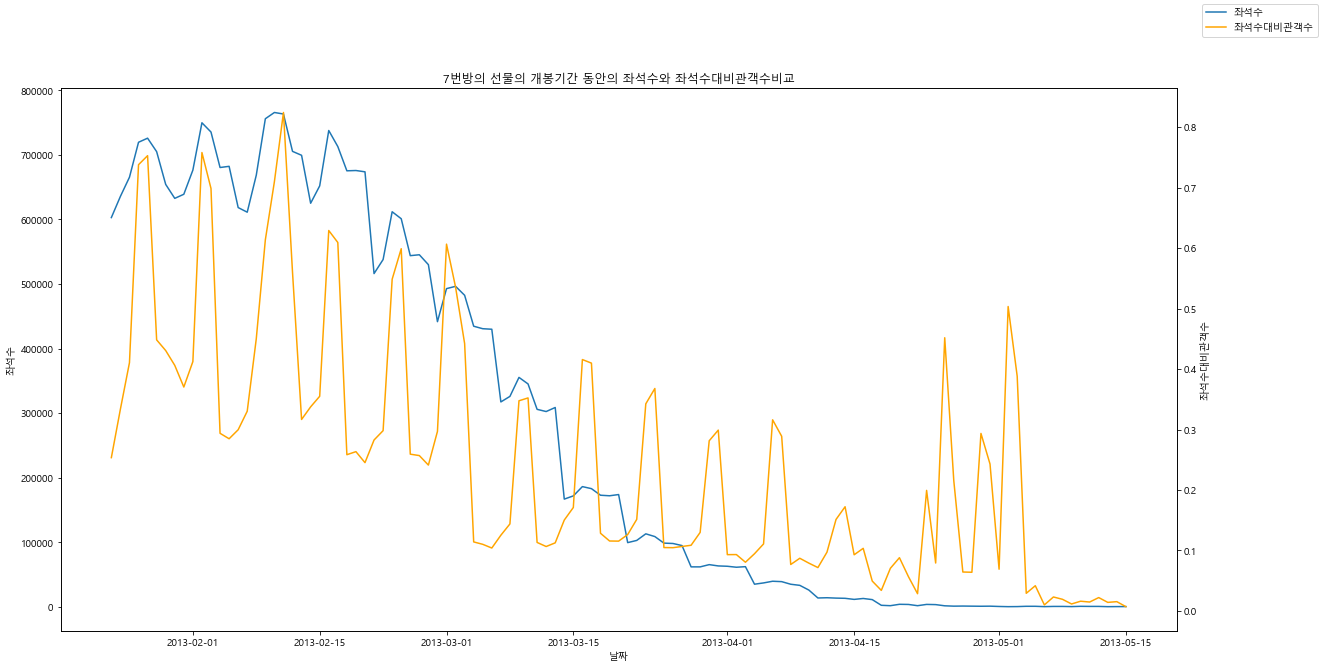

In [23]:
twinlineplotting(["좌석수", "좌석수대비관객수"], df=con_df)

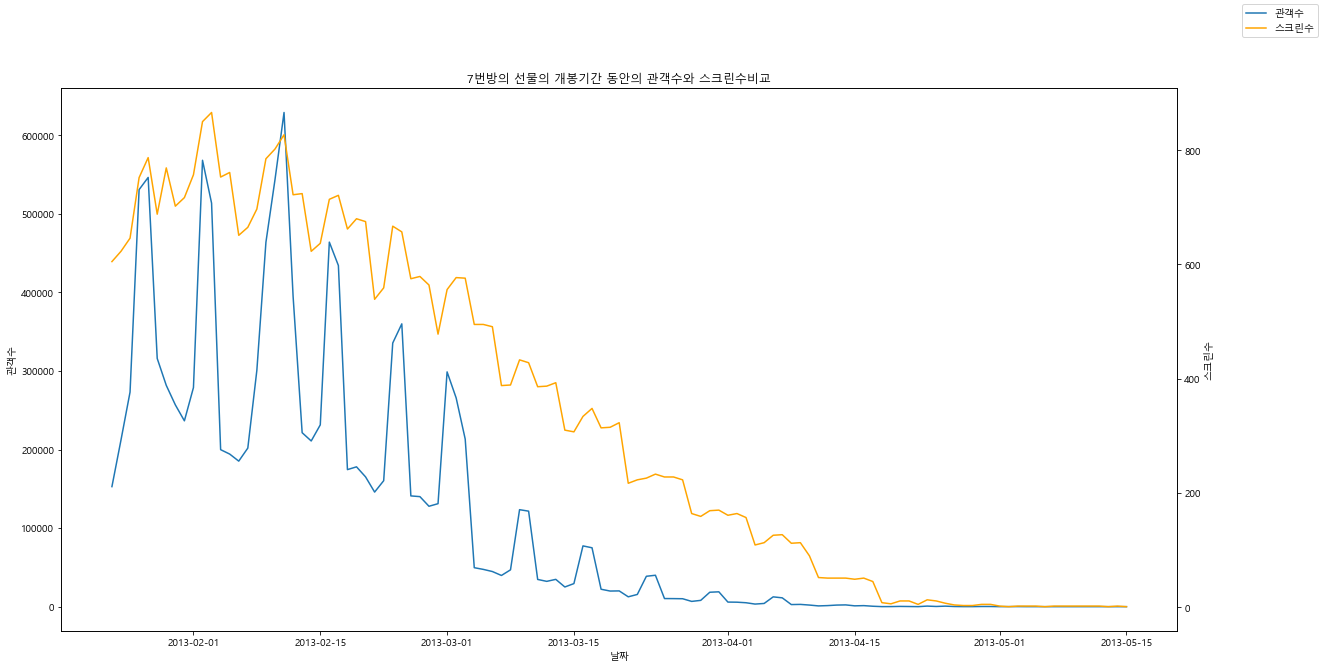

In [24]:
twinlineplotting(["관객수", "스크린수"], df=con_df)

In [25]:
reviews

,평점,내용
0,10,영화는 뻔했고 설정은 억지였다 하지만 그걸 살려낸 배우들이 대단한영화. 그중심엔 ...
1,7,천만영화의 부끄러운 실체. 배우들간의 앙상블은 훌륭했으나 작위적이고 평면적인 스토리...
2,7,천만관객을 끌어모은 것은 오직 배우들의 힘.
3,8,뜬금없는 열기구...
4,10,연기 정말 장난아님
...,...,...
44487,1,토나올 정도로 역겨운 감성팔이 중독 영화.. 이런 독극물 같은 영상 만드는 ㅅㄲ는 ...
44488,1,원래 영화 볼때 머리 비워두고 보는데 이 영화는 보는 내내 너무 억지스러웠다.천만 ...
44489,6,"억지 감동, 신파 작렬. 유승룡도 연기는 잘 하지만 독한 인상으로 그런 역을 하니 ..."
44490,2,류승룡 지적장애인 연기 더럽게못함 ㅋ 조승우 연기못봣냐? 그게 진짜 명연기지 류승룡...
